**Situación**
La congestión y el tráfico en las ciudades es un fenómeno natural que emerge de las distintas actividades urbanas y su concentración espacial.

**Complicación**
El transporte de personas también conlleva accidentes, con la correspondiente pérdida de vidas, problemas de salud y lesiones a las personas involucradas, daño a la propiedad pública y privada, y costo de tiempo a personas no involucradas.

**Propuesta**
Caracterizar la accidentabilidad en Santiago para apoyar el diseño de políticas públicas que reduzcan la cantidad de accidentes.

In [1]:
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from aves.data import census
from pathlib import Path
from aves.features.geo import clip_area_geodataframe
from aves.visualization.figures import small_multiples_from_geodataframe
from aves.visualization.maps import choropleth_map

sns.set_context('paper')
sns.set_style('ticks')

## Construcción del Dataset

In [2]:
AVES_ROOT = Path("..") / ".." / ".."

https://mapas-conaset.opendata.arcgis.com/

https://mapas-conaset.opendata.arcgis.com/datasets/4b636b2f27164b0ebbeca0ab9db4d08a_0/explore

In [3]:
data_path = AVES_ROOT / "data" / "external" / "conaset"

if not data_path.exists():
    data_path.mkdir(parents=True)

In [4]:
file_path = data_path / "2019-rm-accidents.json"

if not file_path.exists():
    import requests
    r = requests.get('https://opendata.arcgis.com/api/v3/datasets/4b636b2f27164b0ebbeca0ab9db4d08a_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1')
    with open(file_path, 'wt') as f:
        f.write(r.text)

In [5]:
gdf = gpd.read_file(file_path, dtypes={'Fecha': 'str', 'Hora': 'str'}).to_crs('epsg:5361')

In [6]:
gdf

,FID,FID_1,LABELID,POINT_X,POINT_Y,FID_2,COMUNAREAL,VAL_COM,OBJECTID,A_O,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
0,1,3961,1379667,-70.741329,-33.719780,274,BUIN,1,37967,2021,...,1,SECO,1,DESPEJADO,0,0,0,2,0,POINT (338656.316 6267552.266)
1,2,3962,1325515,-70.727583,-33.719457,274,BUIN,1,1937,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (339929.537 6267609.475)
2,3,3963,1370318,-70.741774,-33.719085,274,BUIN,1,31482,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (338613.770 6267628.618)
3,4,3964,1355153,-70.734031,-33.718968,274,BUIN,1,21418,2021,...,1,SECO,1,DESPEJADO,0,1,0,0,1,POINT (339331.084 6267653.634)
4,5,5750,1364514,-70.710072,-33.500934,129,CERRILLOS,1,27247,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,1,POINT (341151.702 6291868.526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20910,20911,55793,1325718,-70.640760,-33.383363,190,RECOLETA,2,1735,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20911,20912,55794,1335059,-70.640760,-33.383363,190,RECOLETA,2,5933,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20912,20913,55795,1334939,-70.640760,-33.383363,190,RECOLETA,2,5939,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)
20913,20914,55796,1332699,-70.640760,-33.383363,190,RECOLETA,2,6669,2021,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (347385.025 6305009.480)


<Axes: >

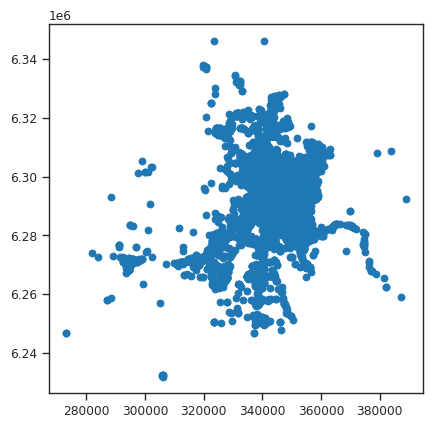

In [7]:
gdf.plot()

In [8]:
gdf.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

## Limpiado, Filtrado y Pre-Procesamiento

<Axes: >

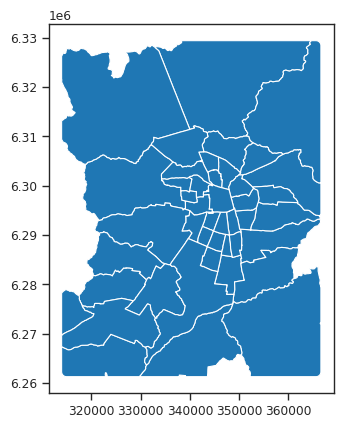

In [9]:
comunas = census.read_census_map(
    "comuna", path=AVES_ROOT / "data" / "external" / "censo_2017_R13"
).to_crs("epsg:5361")

zones = (
    gpd.read_file(AVES_ROOT / "data" / "processed" / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(comunas.crs)
)

comunas_urbanas = (
    comunas[comunas["COMUNA"].isin(zones["Com"].unique())]
    .drop("NOM_COMUNA", axis=1)
    .copy()
)

comunas_urbanas["NombreComuna"] = comunas_urbanas["COMUNA"].map(
    dict(zip(zones["Com"], zones["Comuna"].str.upper()))
)

bounding_box = zones.total_bounds
comunas_urbanas = clip_area_geodataframe(
    comunas_urbanas, zones.total_bounds, buffer=1000
)

comunas_urbanas.plot()

In [10]:
comunas_urbanas["NombreComuna"] = comunas_urbanas["NombreComuna"].replace(
    {"Á": "A", "Ú": "U", "Ó": "O", "Í": "I", "É": "E"}, regex=True
)


In [11]:
gdf[['COMUNAREAL', 'Comuna_1']].value_counts()

COMUNAREAL     Comuna_1     
SANTIAGO       SANTIAGO         1673
PUENTE ALTO    PUENTE ALTO      1327
MAIPU          MAIPU            1211
PROVIDENCIA    PROVIDENCIA      1179
SAN BERNARDO   SAN BERNARDO     1122
                                ... 
QUINTA NORMAL  PUENTE ALTO         1
               PUDAHUEL            1
PENALOLEN      INDEPENDENCIA       1
               LA CISTERNA         1
QUINTA NORMAL  INDEPENDENCIA       1
Name: count, Length: 387, dtype: int64

In [12]:
len(gdf[gdf['COMUNAREAL'] != gdf['Comuna_1']]) / len(gdf)

0.15778149653358833

<Axes: >

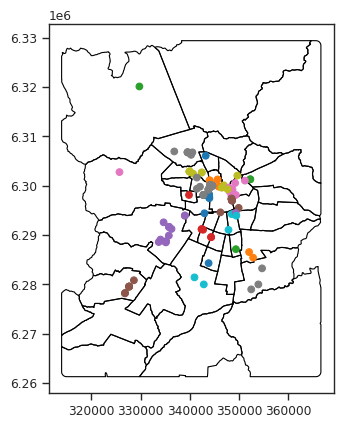

In [13]:
ax = comunas_urbanas.plot(edgecolor="black", facecolor="none")
gdf[(gdf["COMUNAREAL"] != gdf["Comuna_1"]) & (gdf["Comuna_1"] == "SANTIAGO")].plot(
    column="COMUNAREAL", legend=False, ax=ax
)


<Axes: >

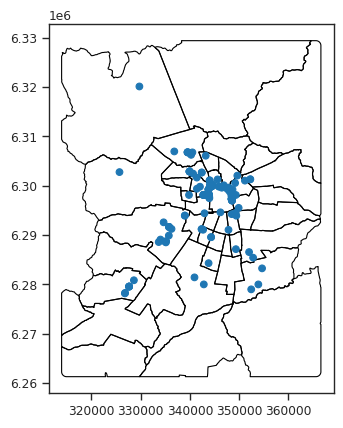

In [14]:
ax = comunas_urbanas.plot(edgecolor="black", facecolor="none")
gdf[(gdf["COMUNAREAL"] != gdf["Comuna_1"]) & (gdf["Comuna_1"] == "SANTIAGO")].plot(
    column="Comuna_1", legend=False, ax=ax
)

/home/egraells/miniconda3/envs/aves/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

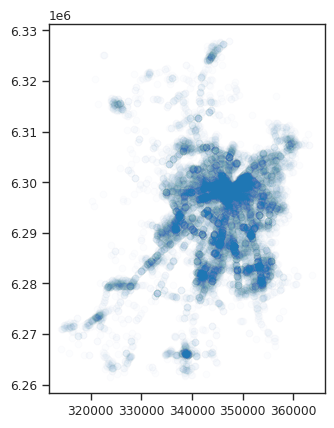

In [15]:
scl_accidents = gpd.sjoin(gdf.to_crs(comunas_urbanas.crs), comunas_urbanas, op='within')

scl_accidents.plot(alpha=0.01)

In [16]:
scl_accidents['Fallecidos'].value_counts()

Fallecidos
0    20108
1      220
2        7
Name: count, dtype: int64

In [17]:
scl_accidents['Graves'].value_counts()

Graves
0    18502
1     1752
2       67
3       11
5        2
4        1
Name: count, dtype: int64

In [18]:
scl_accidents['Menos_Grav'].value_counts()

Menos_Grav
0    19603
1      696
2       31
3        4
7        1
Name: count, dtype: int64

In [19]:
scl_accidents['Ilesos'].value_counts()

Ilesos
2    8914
1    8692
0    2125
3     510
4      70
5      14
6       8
7       2
Name: count, dtype: int64

In [20]:
scl_accidents['Leves'].value_counts()

Leves
0    14972
1     4218
2      890
3      182
4       46
5       18
6        6
7        2
8        1
Name: count, dtype: int64

In [21]:
scl_accidents['victimas'] = gdf[['Ilesos', 'Graves', 'Menos_Grav', 'Fallecidos', 'Leves']].sum(axis=1)

<Axes: xlabel='victimas'>

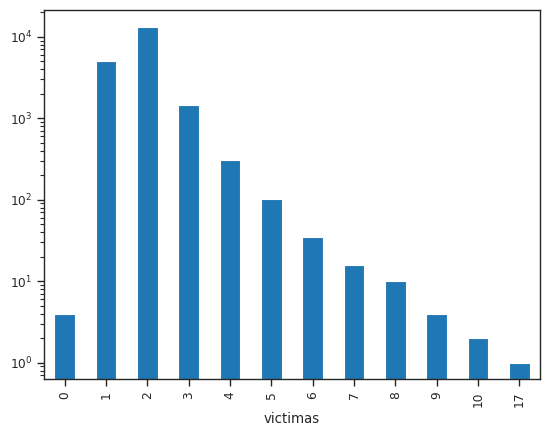

In [22]:
scl_accidents['victimas'].value_counts(sort=False).sort_index().plot(kind='bar', logy=True)

In [23]:
scl_accidents['Fecha']

0       2021-09-09 00:00:00+00:00
1       2021-01-13 00:00:00+00:00
2       2021-08-04 00:00:00+00:00
3       2021-06-04 00:00:00+00:00
6       2021-02-26 00:00:00+00:00
                   ...           
17995   2021-02-02 00:00:00+00:00
17996   2021-05-26 00:00:00+00:00
17997   2021-08-08 00:00:00+00:00
17998   2021-04-25 00:00:00+00:00
17999   2021-01-22 00:00:00+00:00
Name: Fecha, Length: 20335, dtype: datetime64[ns, UTC]

In [24]:
scl_accidents['fecha'] = pd.to_datetime(gdf['Fecha'])

In [25]:
scl_accidents['Hora']

0       1899-12-30 00:00:00+00:00
1       1899-12-30 00:00:00+00:00
2       1899-12-30 00:00:00+00:00
3       1899-12-30 00:00:00+00:00
6       1899-12-30 00:00:00+00:00
                   ...           
17995   1899-12-30 00:00:00+00:00
17996   1899-12-30 00:00:00+00:00
17997   1899-12-30 00:00:00+00:00
17998   1899-12-30 00:00:00+00:00
17999   1899-12-30 00:00:00+00:00
Name: Hora, Length: 20335, dtype: datetime64[ns, UTC]

## ¿Qué contiene?

In [26]:
gdf.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

In [27]:
scl_accidents['Condición'].value_counts()

Condición
SECO          19787
HUMEDO          327
MOJADO          176
CON ACEITE       13
ESCARCHA         11
                  9
GRAVILLA          8
OTROS             3
CON BARRO         1
Name: count, dtype: int64

In [28]:
scl_accidents['Tipo__CONA'].value_counts()

Tipo__CONA
COLISION     13310
CHOQUE        4444
ATROPELLO     1335
VOLCADURA      735
OTRO TIPO      304
CAIDA          203
INCENDIO         4
Name: count, dtype: int64

In [29]:
scl_accidents['Causa__CON'].value_counts()

Causa__CON
IMPRUDENCIA DEL CONDUCTOR         11791
DESOBEDIENCIA A SEÑALIZACION       2327
OTRAS CAUSAS                       1709
CAUSAS NO DETERMINADAS             1689
ALCOHOL EN CONDUCTOR               1091
PERDIDA CONTROL VEHICULO            774
IMPRUDENCIA DEL PEATON              324
VELOCIDAD IMPRUDENTE                311
FALLAS MECANICAS                    146
DROGAS Y/O FATIGA EN CONDUCTOR       68
DEFICIENCIAS VIALES                  53
IMPRUDENCIA DEL PASAJERO             36
ALCOHOL EN PEATON                    16
Name: count, dtype: int64

## ¿Cuándo?

<Axes: xlabel='fecha'>

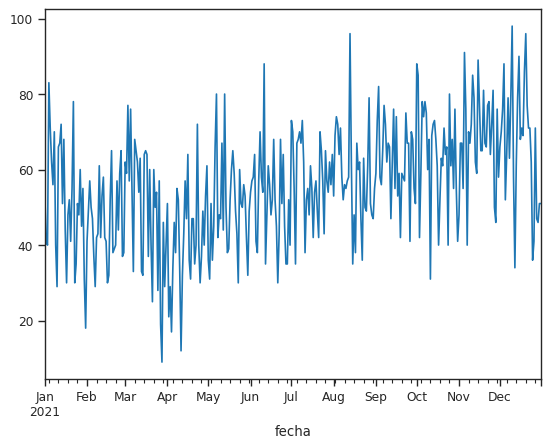

In [30]:
scl_accidents.resample('1d', on='fecha').size().plot()

<Axes: xlabel='fecha'>

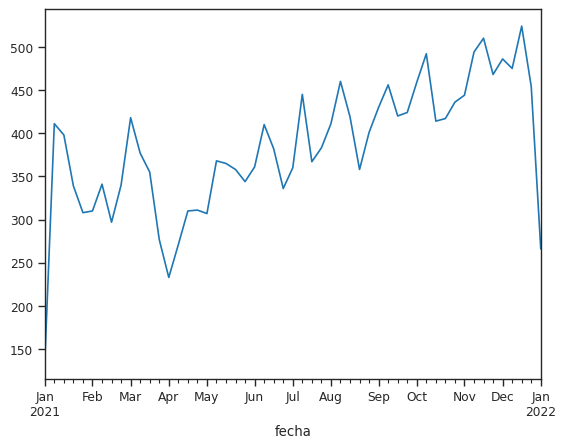

In [31]:
scl_accidents.resample('1w', on='fecha').size().plot()

In [32]:
scl_accidents['fecha']

0       2021-09-09 00:00:00+00:00
1       2021-01-13 00:00:00+00:00
2       2021-08-04 00:00:00+00:00
3       2021-06-04 00:00:00+00:00
6       2021-02-26 00:00:00+00:00
                   ...           
17995   2021-02-02 00:00:00+00:00
17996   2021-05-26 00:00:00+00:00
17997   2021-08-08 00:00:00+00:00
17998   2021-04-25 00:00:00+00:00
17999   2021-01-22 00:00:00+00:00
Name: fecha, Length: 20335, dtype: datetime64[ns, UTC]

## ¿Dónde?

<Axes: >

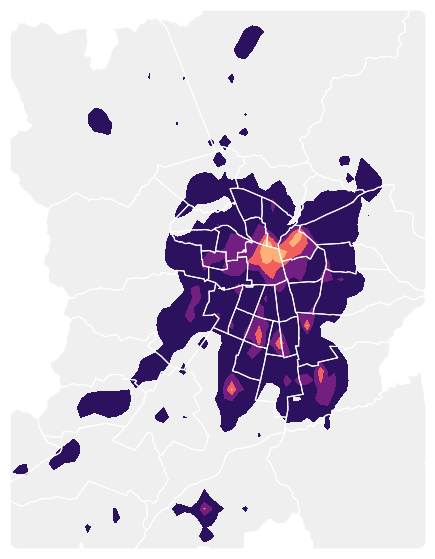

In [33]:
from aves.visualization.maps import heat_map, heatmap
from aves.visualization.figures import small_multiples_from_geodataframe

fig, ax = small_multiples_from_geodataframe(comunas_urbanas, 1, height=7)

comunas_urbanas.plot(ax=ax, facecolor="#efefef", edgecolor="none")
heat_map(ax, scl_accidents, weight="victimas", low_threshold=0.05)
comunas_urbanas.plot(ax=ax, facecolor="none", edgecolor="white")


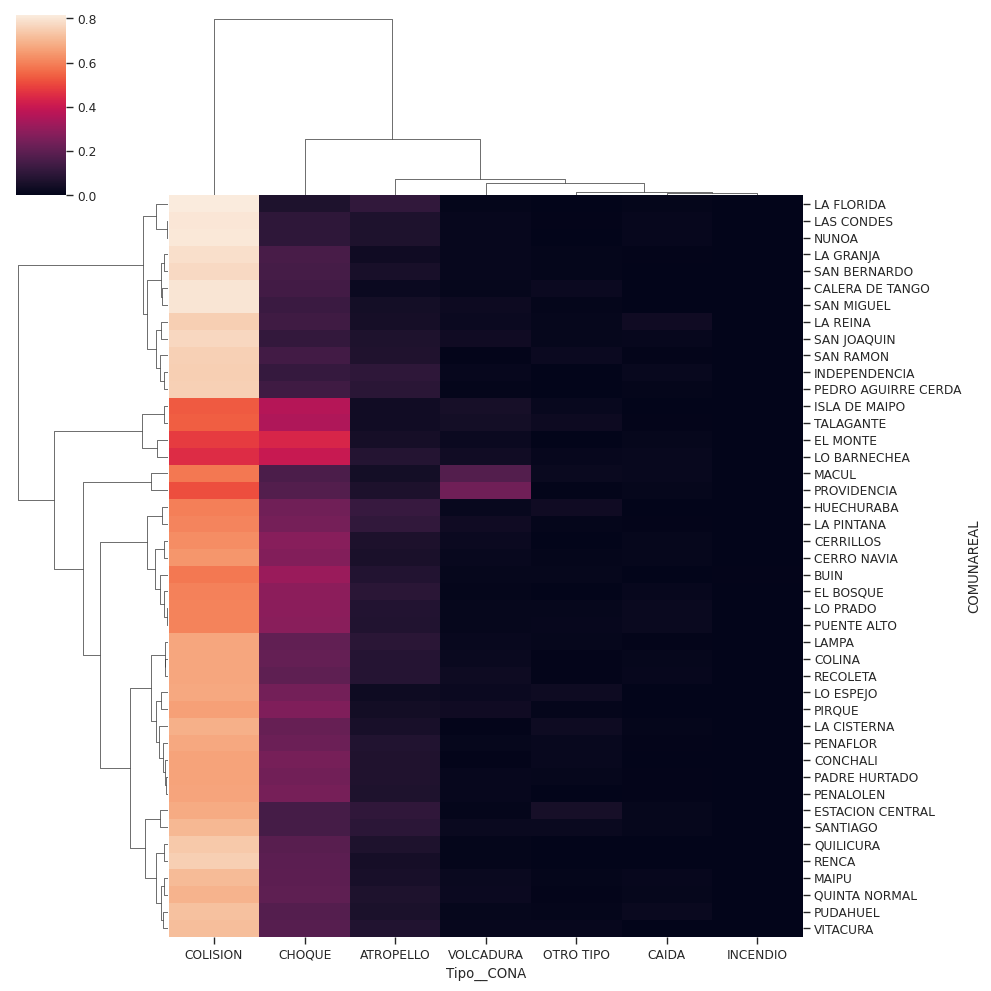

In [34]:
from aves.features.utils import normalize_rows
victimas_por_comuna = scl_accidents.groupby(['COMUNAREAL', 'Tipo__CONA'])['victimas'].sum().unstack(fill_value=0).pipe(normalize_rows)
sns.clustermap(victimas_por_comuna, method='ward')

In [35]:
scl_accidents['Ubicación'].value_counts()

Ubicación
TRAMO DE VIA RECTA                9328
CRUCE CON SEMAFORO FUNCIONANDO    5203
CRUCE CON SEÑAL PARE              2173
CRUCE CON SEÑAL CEDA EL PASO      1211
OTROS NO CONSIDERADOS             1097
CRUCE SIN SEÑALIZACION             674
ACERA O BERMA                      156
ROTONDA                            135
TRAMO DE VIA CURVA HORIZONTAL      104
CRUCE CON SEMAFORO APAGADO          93
ENLACE A NIVEL                      44
TRAMO DE VIA CURVA VERTICAL         34
ENLACE A DESNIVEL                   24
TUNEL                               18
PUENTE                              16
PLAZA DE PEAJE                      11
ACCESO NO HABILITADO                11
CRUCE REGULADO POR CARABINERO        3
Name: count, dtype: int64

## ¿Cómo?

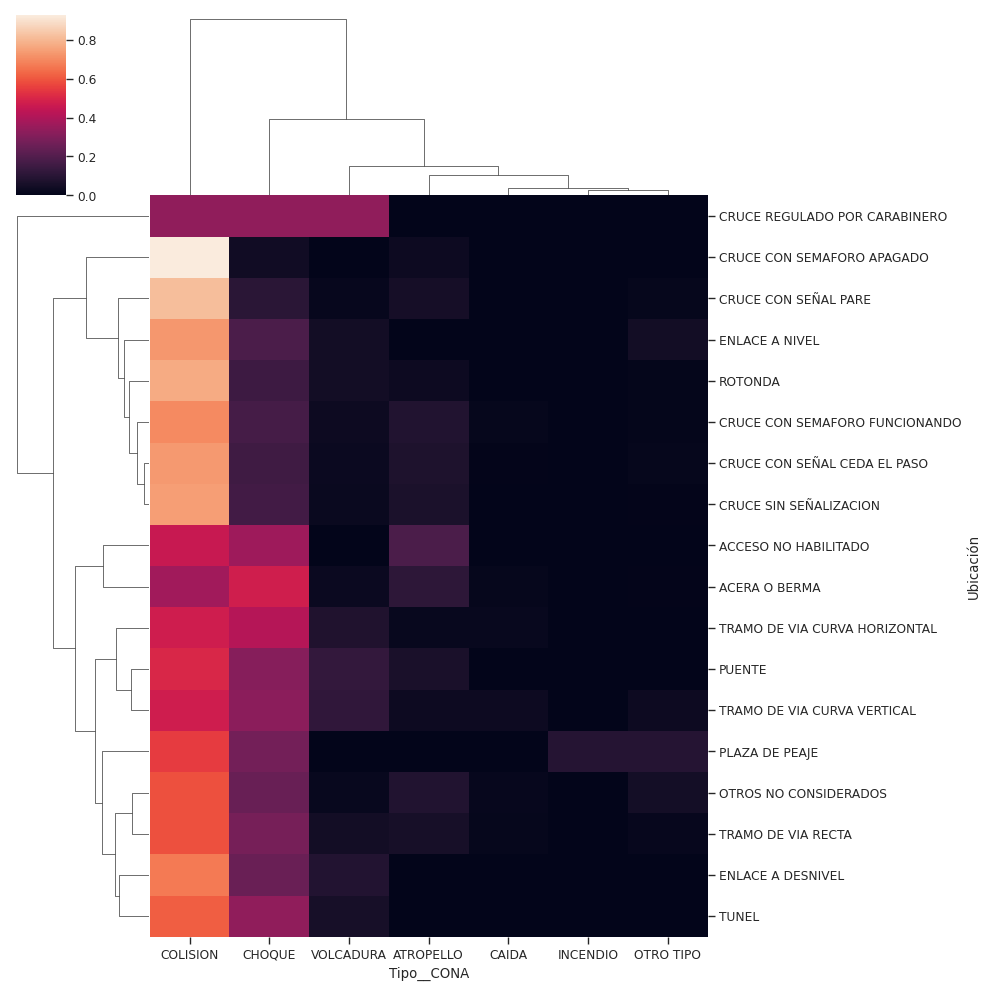

In [36]:
sns.clustermap(
    scl_accidents.groupby("Ubicación")["Tipo__CONA"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

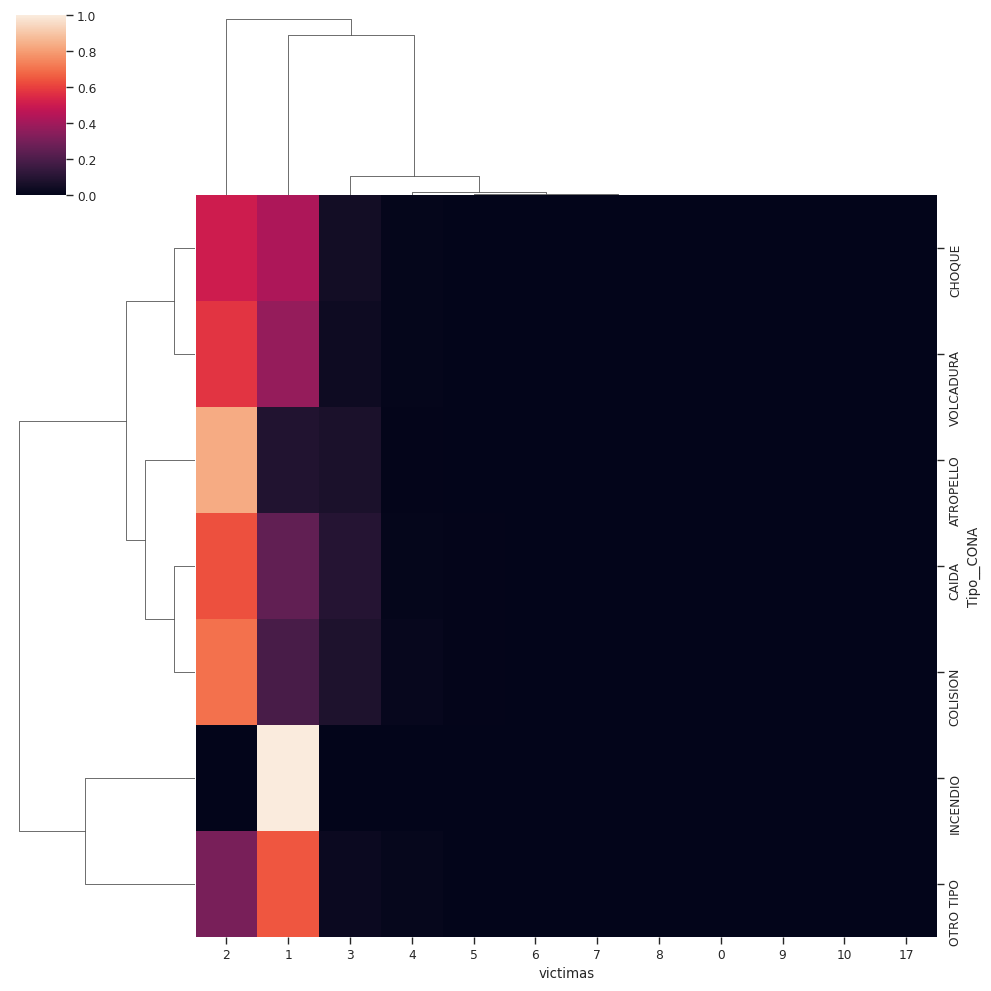

In [37]:
sns.clustermap(
    scl_accidents.groupby("Tipo__CONA")["victimas"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)


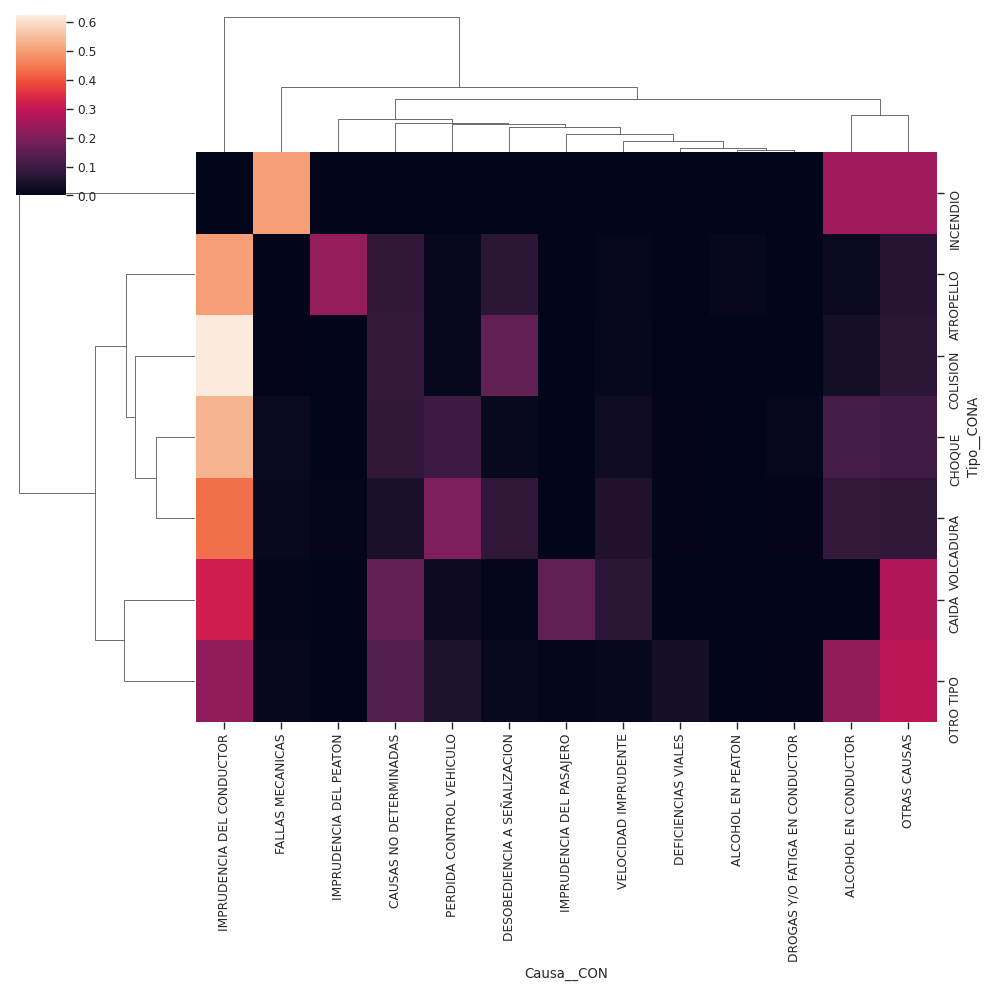

In [38]:
sns.clustermap(
    scl_accidents.groupby("Tipo__CONA")["Causa__CON"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

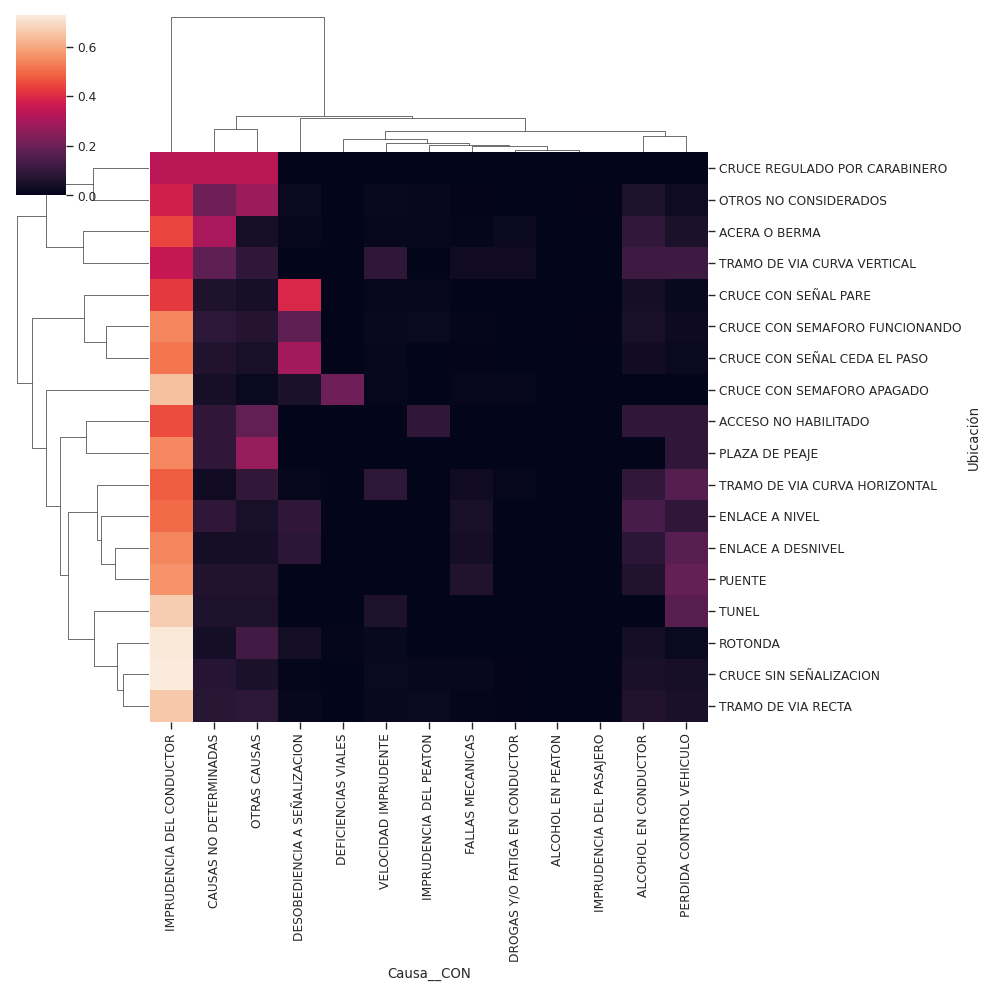

In [39]:
sns.clustermap(
    scl_accidents.groupby("Ubicación")["Causa__CON"]
    .value_counts()
    .unstack(fill_value=0)
    .pipe(normalize_rows)
)

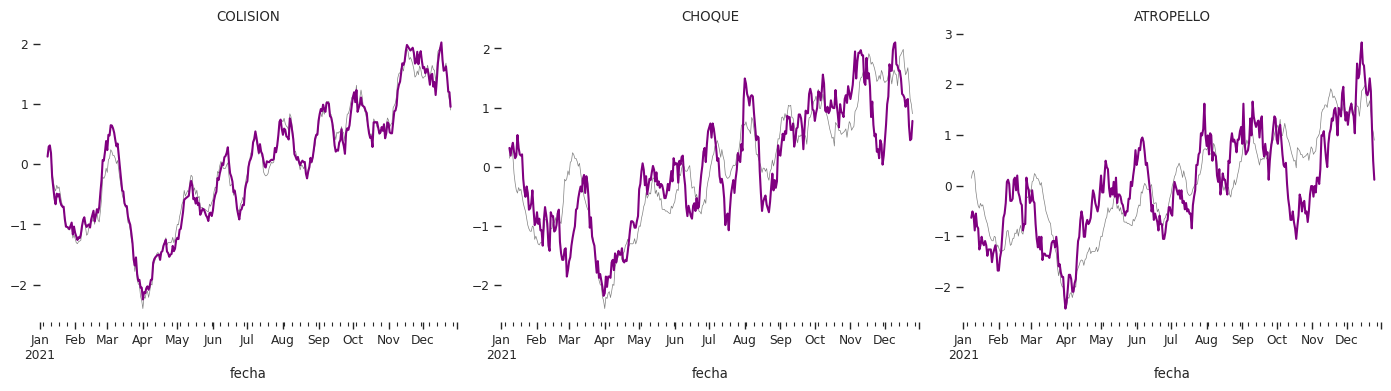

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

mean_accidents = (
    lambda name, x: x.resample("1d", on="fecha")
    # .size()
    ["victimas"]
    .sum()
    .rolling(14, center=True)
    .mean()
    .rename(name)
    .to_frame()
    .apply(lambda x: (x - x.mean()) / x.std())
)

for ax, cat in zip(axes, ["COLISION", "CHOQUE", "ATROPELLO"]):
    # print(g)
    g = scl_accidents[scl_accidents["Tipo__CONA"] == cat]
    mean_accidents("all", scl_accidents).plot(ax=ax, color="grey", linewidth=0.5, legend=False)
    mean_accidents(cat, g).plot(ax=ax, linewidth=1.5, color="purple", legend=False)
    ax.set_title(cat)
    sns.despine(ax=ax, left=True, bottom=True)

fig.tight_layout()


## Autocorrelación Espacial

In [41]:
from libpysal.weights import DistanceBand

w = DistanceBand.from_dataframe(scl_accidents, threshold=500, ids='FID')
w.n

/home/egraells/miniconda3/envs/aves/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/home/egraells/miniconda3/envs/aves/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/home/egraells/miniconda3/envs/aves

20335

<Axes: >

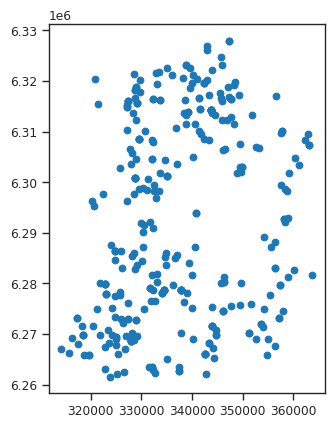

In [42]:
scl_accidents[scl_accidents['FID'].isin(w.islands)].plot()

<Axes: >

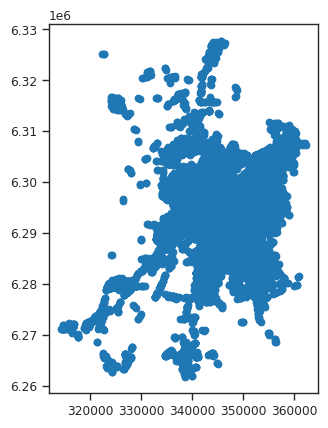

In [43]:
connected_accidents = scl_accidents[~scl_accidents['FID'].isin(w.islands)]
connected_accidents.plot()

In [44]:
w = DistanceBand.from_dataframe(connected_accidents, threshold=500)
w.n

/home/egraells/miniconda3/envs/aves/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 179 disconnected components.
  warnings.warn(message)


19999

In [45]:
w.transform = "R"


In [47]:
from esda.moran import Moran

moran = Moran(connected_accidents["victimas"], w)
moran.I, moran.p_sim

(0.06738472797090994, 0.001)

**¿Qué concluyen?**